In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
db = pd.read_csv('diabetes.csv')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
db.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
db.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [4]:
feature=db.iloc[:,[0,1,2,3,4,5,6,7]]
label=db['Outcome']

In [5]:
label

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
x_train=feature[:700]
y_train=label[:700]

x_test=feature[700:750]
y_test=label[700:750]

x_val=feature[750:]
y_val=label[750:]


In [28]:
from keras.models import Sequential 
from keras.layers import Dense

In [29]:
model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 8))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile( loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [30]:
model.fit( x_train , y_train, epochs = 20, batch_size = 5, validation_data = (x_val, y_val))

Epoch 1/20
140/140 [==============================] - 1s 3ms/step - loss: 0.9516 - accuracy: 0.6200 - val_loss: 1.1069 - val_accuracy: 0.6111
Epoch 2/20
140/140 [==============================] - 0s 2ms/step - loss: 0.7089 - accuracy: 0.6400 - val_loss: 0.6437 - val_accuracy: 0.6667
Epoch 3/20
140/140 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6471 - val_loss: 0.7024 - val_accuracy: 0.5556
Epoch 4/20
140/140 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6829 - val_loss: 0.7222 - val_accuracy: 0.7778
Epoch 5/20
140/140 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6829 - val_loss: 0.6534 - val_accuracy: 0.5556
Epoch 6/20
140/140 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.6957 - val_loss: 0.6935 - val_accuracy: 0.5556
Epoch 7/20
140/140 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.6914 - val_loss: 0.7490 - val_accuracy: 0.7222
Epoch 

In [31]:
model.evaluate(x_test , y_test)
## acccuracy is y_test value which is 74%


2/2 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.7400


[0.6751542687416077, 0.7400000095367432]

# **Using this model we get accuracy of 74% as seen above**

# **Alternate model using SVM for better accuracy**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(db.loc[:, db.columns != 'Outcome'], db['Outcome'], stratify=db['Outcome'], random_state=66)

In [12]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.77
Accuracy on test set: 0.76


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
train=svc.score(X_train_scaled, y_train)
test=svc.score(X_test_scaled, y_test)
print("Accuracy on training set: {:.2f}".format(train*100))
print("Accuracy on test set: {:.2f}".format(test*100))

Accuracy on training set: 78.82
Accuracy on test set: 79.69


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


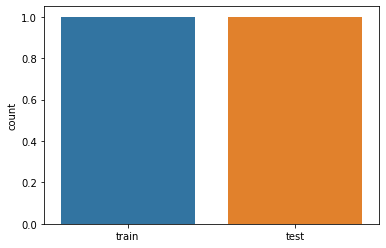

In [14]:
import seaborn as sns
sns.countplot(['train','test'],label="Accuracy")
